In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
results = pd.read_csv('../modeling/modeling_results.csv')
results.drop(columns=['Unnamed: 0'], inplace=True)
results

,year,km,range,max_vel,zero_hundred,high_range,performance,four_wheel_drive,rear_wheel_drive,sell_type_Nuevo,...,color_GREY,color_RED,color_SILVER,color_WHITE,country_france,country_italy,country_portugal,country_spain,predicted_price,real_price
0,2020,44.0,530.0,261.0,3.4,True,True,True,False,False,...,False,False,False,True,True,False,False,False,32219.435635,32500.0
1,2025,4642.0,565.0,217.0,5.9,True,False,False,True,True,...,False,False,False,True,False,False,False,True,45070.279735,43970.0
2,2024,815.0,528.0,262.0,3.1,False,True,True,False,True,...,False,False,False,False,False,True,False,False,57634.450152,57285.0
3,2024,0.0,629.0,201.0,4.4,True,False,False,False,True,...,False,True,False,False,False,False,True,False,52860.670903,52715.0
4,2025,0.0,513.0,201.0,6.1,False,False,False,True,True,...,False,False,True,False,False,False,True,False,43524.101168,44675.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2025,0.0,576.0,250.0,3.9,False,False,True,False,True,...,False,False,False,True,False,False,True,False,114966.608672,110975.0
363,2024,0.0,533.0,217.0,5.0,True,False,False,False,True,...,False,False,False,False,False,False,True,False,52746.044753,56215.0
364,2025,29.0,514.0,250.0,3.7,False,True,True,False,True,...,False,False,False,True,False,False,False,True,54371.185260,50990.0
365,2020,61.0,560.0,233.0,4.6,True,False,True,False,False,...,True,False,False,False,False,True,False,False,31435.824785,31000.0


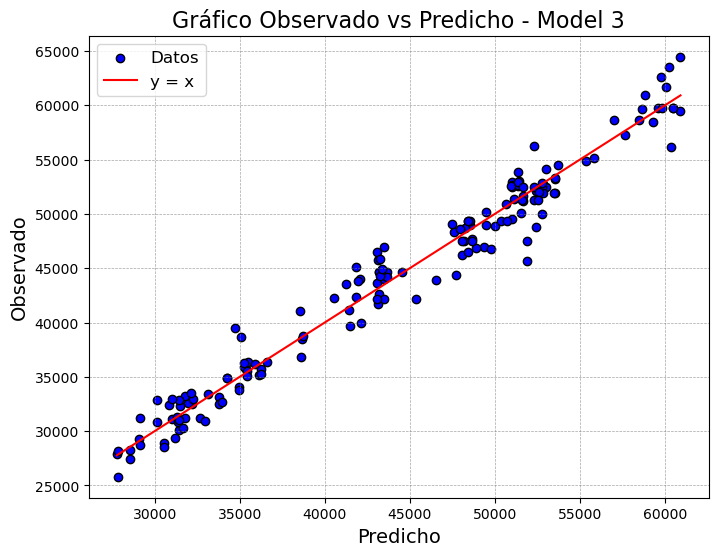

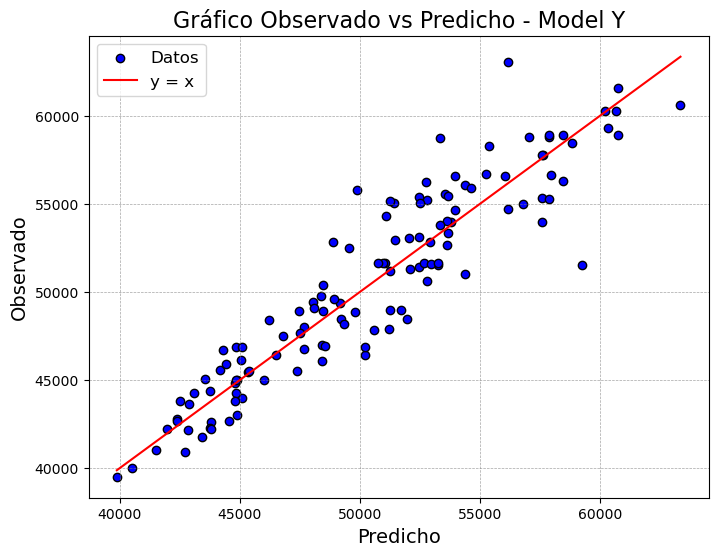

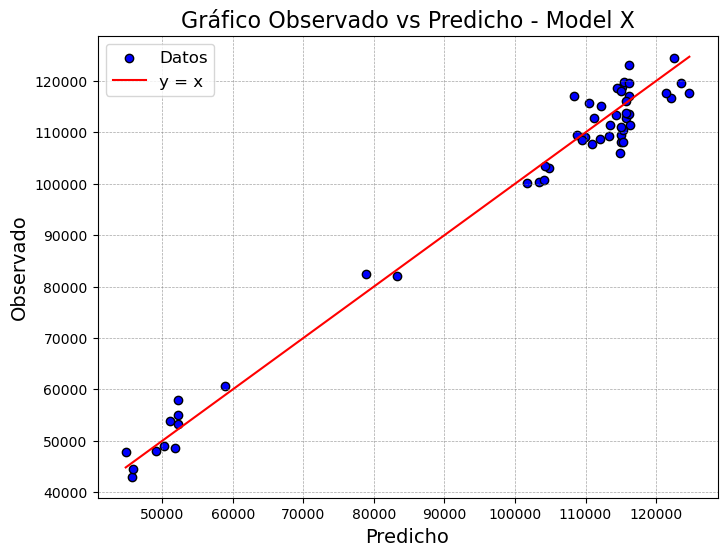

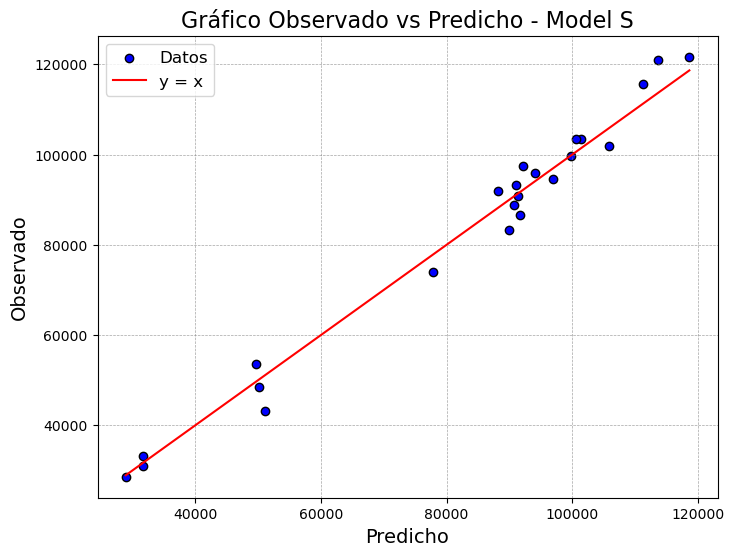

In [15]:
results['model_type'] = results[['car_type_Model 3', 'car_type_Model S', 'car_type_Model X', 'car_type_Model Y']].idxmax(axis=1)
results['model_type'] = results['model_type'].str.replace('car_type_', '')

# Obtener los tipos de modelos únicos
models = results['model_type'].unique()

# Crear un gráfico por cada modelo
for model in models:
    # Filtrar los datos para el modelo actual
    df_model = results[results['model_type'] == model]
    
    # Valores predichos y reales
    x = df_model['predicted_price']
    y = df_model['real_price']
    
    # Crear el gráfico
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, c='blue', edgecolors='black', label='Datos')  # Puntos
    plt.plot([min(x), max(x)], [min(x), max(x)], 'r-', label='y = x')  # Línea ideal
    
    # Configurar el diseño
    plt.title(f'Gráfico Observado vs Predicho - {model}', fontsize=16)
    plt.xlabel('Predicho', fontsize=14)
    plt.ylabel('Observado', fontsize=14)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend(fontsize=12)
    plt.show()